# Plotting Distribution of Demographic Information in DGC Migraine Study

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from plot_functions.load_palette import load_palette
import data_processing.import_data as imp

In [2]:
palette = load_palette()
demog_df = imp.import_demographic_file()

In [3]:
from data_processing.load_env import load_env
env = load_env()
data_dict = pd.read_csv(env['data_dictionary_file'])
data_dict.head()

,Variable / Field Name,Form Name,Section Header,Field Type,Field Label,"Choices, Calculations, OR Slider Labels",Field Note,Text Validation Type OR Show Slider Number,Text Validation Min,Text Validation Max,Identifier?,Branching Logic (Show field only if...),Required Field?,Custom Alignment,Question Number (surveys only),Matrix Group Name,Matrix Ranking?,Field Annotation
0,record_id,contact_info_schedule,NaN,text,Study ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,cont_project,contact_info_schedule,NaN,text,Project Indicator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y,NaN,NaN,NaN,NaN,NaN
2,presc_record_id,contact_info_schedule,NaN,text,Prescreen Record ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,presc_cont_group,contact_info_schedule,NaN,text,Migraine RT Group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,cont_first_name,contact_info_schedule,Contact Information,text,First name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y,NaN,NaN,NaN,NaN,NaN


## Viewing Education, Family Income, Race distributions, Age

In [4]:
edu_dict_str = list(data_dict.loc[data_dict['Variable / Field Name'] == 'demog_highest_education', 'Choices, Calculations, OR Slider Labels'])[0]
edu_dict = {
    int(val.split(', ')[0]): ', '.join(val.split(', ')[1:])
    for val in edu_dict_str.split(' | ')
}
edu_dict
demog_df['demog_highest_education_str'] = demog_df['demog_highest_education'].map(edu_dict)
# Uncomment to combine all types of associates
#demog_df['demog_highest_education_str'] = demog_df['demog_highest_education_str'].str.split('Degree').str[0]

,demog_highest_education
demog_highest_education_str,
Associate's Degree; Academic program,3
"Associate's Degree; Occupational, Technical, or Vocational",1
"Bachelor's Degree (ex. BA, AB, BS, BBA)",13
"Doctoral Degree (ex. PhD, EdD)",3
High school Graduate,1
"Master's Degree (ex. MA, MS, MEng, MEd, MBA)",8
"Professional Degree (MD, DDS, DVM, JD)",1
Some college,3


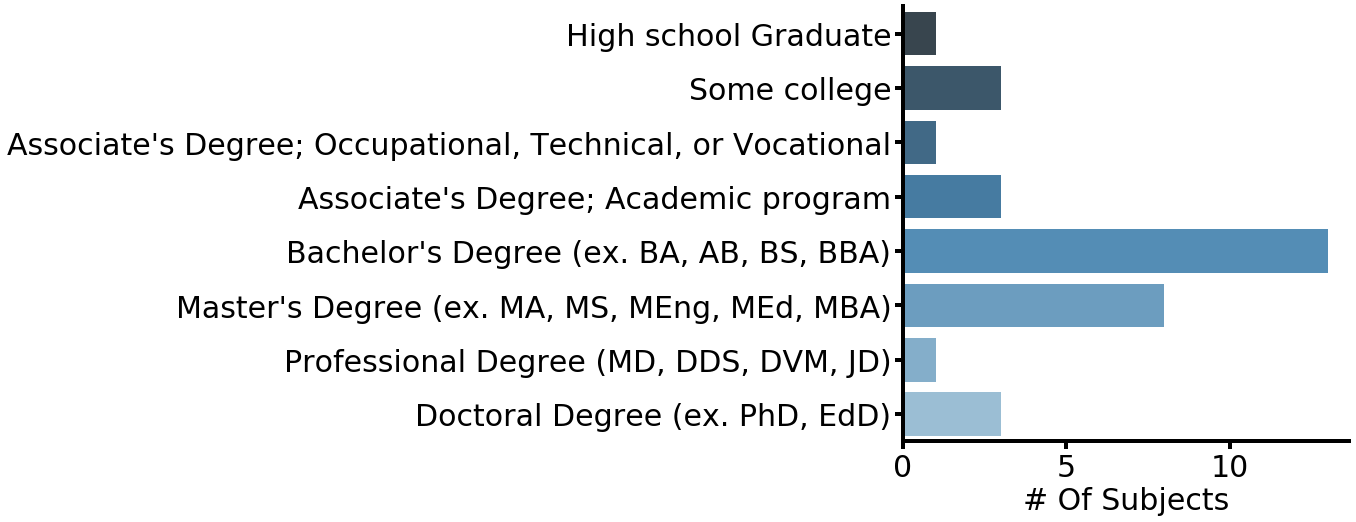

In [5]:
import plot_functions.format_axis as fmt
fig, ax = plt.subplots(figsize=(8, 8))
edu_df = demog_df[['demog_highest_education_str', 'demog_highest_education']].sort_values(by='demog_highest_education')
sns.countplot(
    y=edu_df['demog_highest_education_str'],
    ax=ax,
    palette='Blues_d'
)
ax.set_xlabel('# Of Subjects', fontsize=20)
ax.set_ylabel('')
fmt.despine_thicken_axes(
    ax=ax,
    lw=4,
    fontsize=30,
    rotate_x=0,
)
sns.despine()
edu_df.groupby('demog_highest_education_str').count()

In [6]:
inc_dict_str = list(data_dict.loc[data_dict['Variable / Field Name'] == 'demog_fam_income', 'Choices, Calculations, OR Slider Labels'])[0]
inc_dict = {
    int(val.split(', ')[0]): ', '.join(val.split(', ')[1:])
    for val in inc_dict_str.split(' | ')
}
demog_df['demog_fam_income_str'] = demog_df['demog_fam_income'].map(inc_dict)

,demog_fam_income
demog_fam_income_str,
"$10,000 - $19,999",1
"$100,000 +",12
"$20,000 - $39,999",3
"$40,000 - $59,999",4
"$60,000 - $99,999",9
Don't know,1
"Less than $10,000",1
Prefer not to answer,2


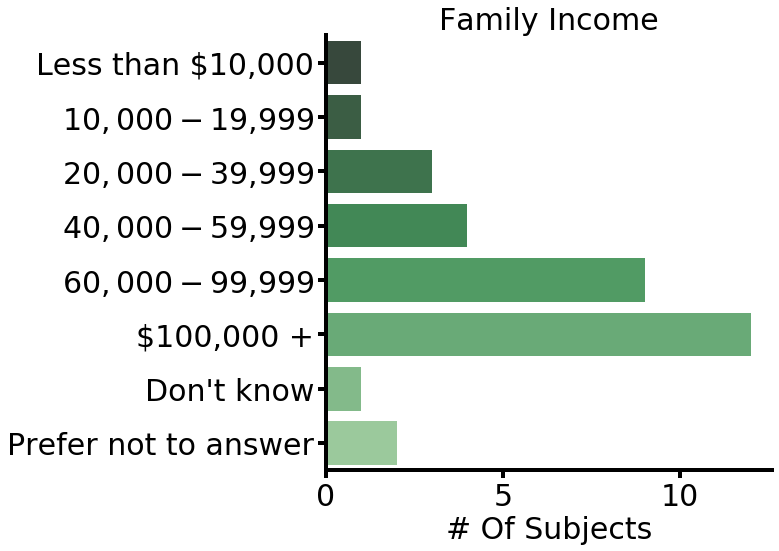

In [7]:
import plot_functions.format_axis as fmt

inc_df = demog_df[['demog_fam_income_str', 'demog_fam_income']].sort_values(by='demog_fam_income')

fig, ax = plt.subplots(figsize=(8, 8))
sns.countplot(
    y=inc_df['demog_fam_income_str'],
    ax=ax,
    #order=order,
    palette='Greens_d'
)
ax.set_xlabel('# Of Subjects', fontsize=20)
ax.set_ylabel('')
fmt.despine_thicken_axes(
    ax=ax,
    lw=4,
    fontsize=30,
    rotate_x=0,
)
sns.despine()
ax.set_title('Family Income', fontsize=30);
inc_df.groupby('demog_fam_income_str').count()

In [8]:
race_dict_str = list(data_dict.loc[data_dict['Variable / Field Name'] == 'demog_race', 'Choices, Calculations, OR Slider Labels'])[0]
race_dict = {
    int(val.split(', ')[0]): ', '.join(val.split(', ')[1:])
    for val in race_dict_str.split(' | ')
}
demog_df['demog_race_str'] = demog_df['demog_race'].map(race_dict)

,demog_race
demog_race_str,
Chinese,1
Japanese,1
Korean,1
Prefer not to answer,3
Some other race,2
White,22


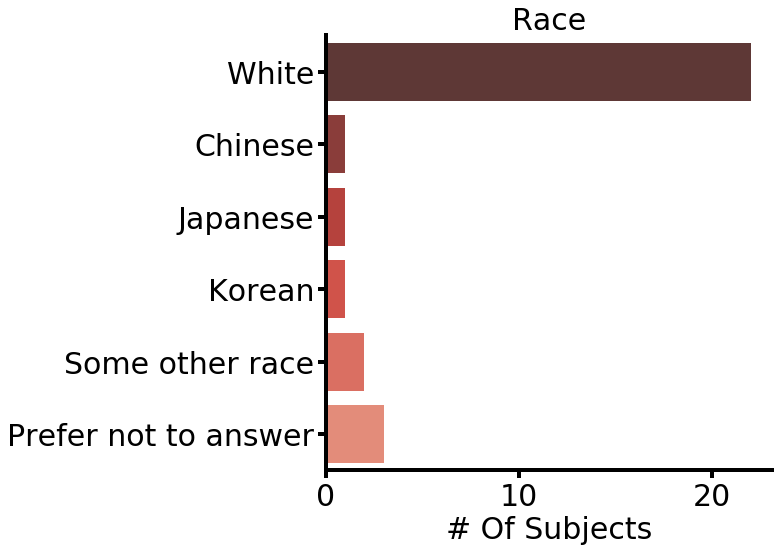

In [9]:
import plot_functions.format_axis as fmt

race_df = demog_df[['demog_race_str', 'demog_race']].sort_values(by='demog_race')

fig, ax = plt.subplots(figsize=(8, 8))
sns.countplot(
    y=race_df['demog_race_str'],
    ax=ax,
    #order=order,
    palette='Reds_d'
)
ax.set_xlabel('# Of Subjects', fontsize=20)
ax.set_ylabel('')
fmt.despine_thicken_axes(
    ax=ax,
    lw=4,
    fontsize=30,
    rotate_x=0,
)
sns.despine()
ax.set_title('Race', fontsize=30);
race_df.groupby('demog_race_str').count()

,cont_age
count,33.000000
mean,38.212121
std,11.529195
min,21.000000
25%,28.000000
50%,37.000000
75%,48.000000
max,57.000000


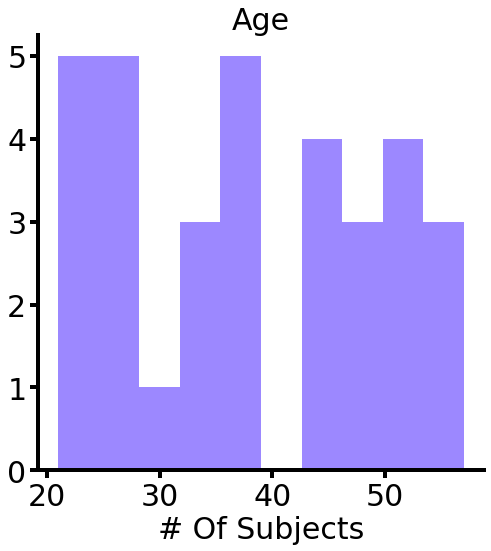

In [10]:
import plot_functions.format_axis as fmt


fig, ax = plt.subplots(figsize=(8, 8))
ax.hist(
    demog_df['cont_age'],
    color=load_palette()['cont_age']
)
ax.set_xlabel('# Of Subjects', fontsize=20)
ax.set_ylabel('')
fmt.despine_thicken_axes(
    ax=ax,
    lw=4,
    fontsize=30,
    rotate_x=0,
)
sns.despine()
ax.set_title('Age', fontsize=30)
pd.DataFrame(demog_df['cont_age'].describe())

## Sheehan Disability Scale at Baseline, Followup, and Change

Paired T results -- t: 2.3328773458881766 p: 0.02679916634768684


/Users/akre96/Code/DGC_Study/venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


sds_score                                                  
              count       mean       std  min   25%   50%   75%   max
time                                                                 
Baseline       30.0  20.533333  6.816478  0.0  18.0  21.0  25.5  30.0
Follow Up      33.0  16.848485  7.562743  0.0  11.0  18.0  22.0  30.0

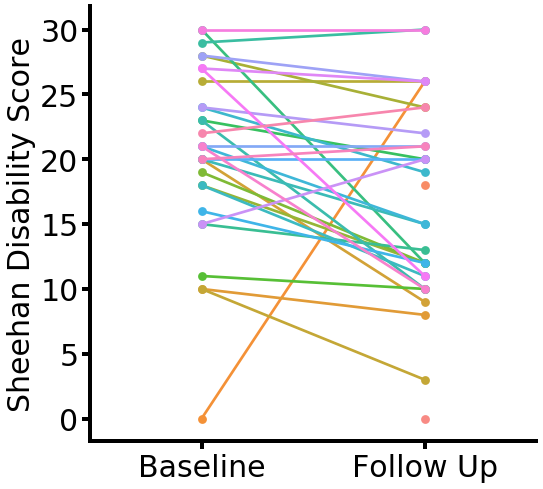

In [14]:
import scipy.stats as stats
import plot_functions.format_axis as fmt
demog_df['sds_score_change'] =  demog_df['sds_score___pfa'] - demog_df['sds_score']
post = demog_df[['sds_score___pfa', 'subject_id']].rename(columns={'sds_score___pfa': 'sds_score'})
baseline = demog_df[['sds_score', 'subject_id']]
nona = demog_df[['sds_score___pfa', 'sds_score']].dropna()
t, p = stats.ttest_rel(nona.sds_score, nona.sds_score___pfa)
print('Paired T results -- t:', t,'p:', p)
post['time'] = 'Follow Up'
baseline['time'] = 'Baseline'
order = ['Baseline', 'Follow Up']

_, ax = plt.subplots(figsize=(8,8))
sds_data = pd.concat([baseline, post])
sns.pointplot(
    x='time',
    y='sds_score',
    data=sds_data,
    hue='subject_id',
    order=order,
    ax=ax
)
ax.legend().remove()
fmt.despine_thicken_axes(
    ax=ax,
    lw=4,
    fontsize=30,
    rotate_x=0,
)
sns.despine()
ax.set_xlabel('')
ax.set_ylabel('Sheehan Disability Score')
sds_data.groupby('time').describe()


,sds_score_change,sds_score___pfa,sds_score
count,30.000000,33.000000,30.000000
mean,-3.266667,16.848485,20.533333
std,7.669615,7.562743,6.816478
min,-18.000000,0.000000,0.000000
25%,-6.750000,11.000000,18.000000
50%,-2.500000,18.000000,21.000000
75%,0.000000,22.000000,25.500000
max,26.000000,30.000000,30.000000


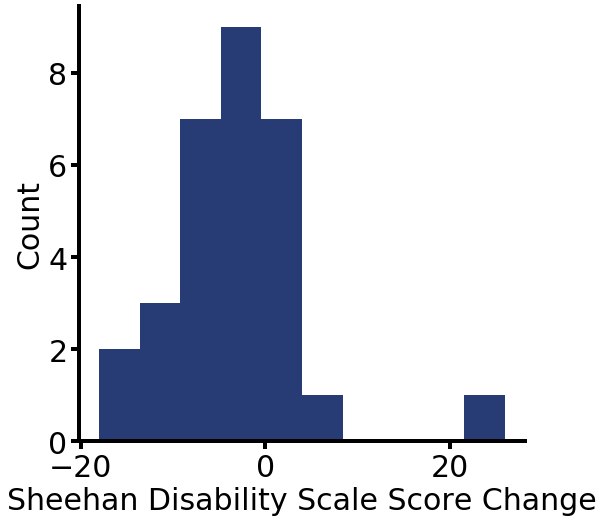

In [15]:
import plot_functions.format_axis as fmt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
ax.hist(
    demog_df['sds_score_change'].dropna(),
    color=load_palette()['sds_score_bs'],
)

ax.set_xlabel('Sheehan Disability Scale Score Change', fontsize=20)

fmt.despine_thicken_axes(
    ax=ax,
    lw=4,
    fontsize=30,

)
ax.set_ylabel('Count')
demog_df[['sds_score_change', 'sds_score___pfa', 'sds_score']].describe()

## Hamilton Depression Scale at Baseline, Followup, and Change

/Users/akre96/Code/DGC_Study/venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


hamd_total                                                  
               count       mean       std  min   25%   50%   75%   max
time                                                                  
Baseline        30.0  17.800000  9.026398  2.0  10.5  18.0  24.0  43.0
Follow Up       27.0  15.703704  6.608938  4.0  10.5  16.0  19.0  34.0

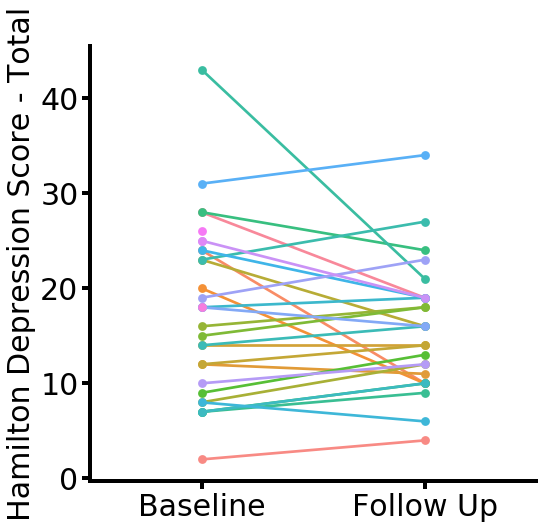

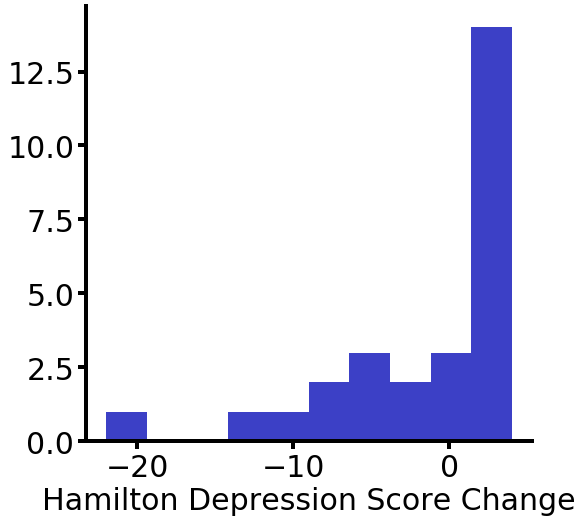

In [12]:
import plot_functions.format_axis as fmt
demog_df['hamd_total_change'] =  demog_df['hamd_total___fa'] - demog_df['hamd_total']
post = demog_df[['hamd_total___fa', 'subject_id']].rename(columns={'hamd_total___fa': 'hamd_total'})
baseline = demog_df[['hamd_total', 'subject_id']]

post['time'] = 'Follow Up'
baseline['time'] = 'Baseline'
order = ['Baseline', 'Follow Up']

_, ax = plt.subplots(figsize=(8,8))
hamd_data = pd.concat([baseline, post])
sns.pointplot(
    x='time',
    y='hamd_total',
    data=hamd_data,
    hue='subject_id',
    order=order,
    ax=ax
)
ax.legend().remove()
fmt.despine_thicken_axes(
    ax=ax,
    lw=4,
    fontsize=30,
    rotate_x=0,
)
sns.despine()
ax.set_xlabel('')
ax.set_ylabel('Hamilton Depression Score - Total')
sds_data.head()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
ax.hist(
    demog_df['hamd_total_change'].dropna(),
    color=load_palette()['catmh_dep_severity_1'],
)

ax.set_xlabel('Hamilton Depression Score Change', fontsize=20)

fmt.despine_thicken_axes(
    ax=ax,
    lw=4,
    fontsize=30,

)
hamd_data.groupby('time').describe()

/Users/akre96/Code/DGC_Study/venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


catmh_dep_severity                                                   \
                       count       mean        std   min     25%    50%   75%   
time                                                                            
Baseline                33.0  50.927273  18.954028   9.2  38.800  55.00  62.5   
Follow Up               32.0  48.018750  18.534509  11.8  34.975  46.85  63.5   

                 
            max  
time             
Baseline   80.7  
Follow Up  75.3

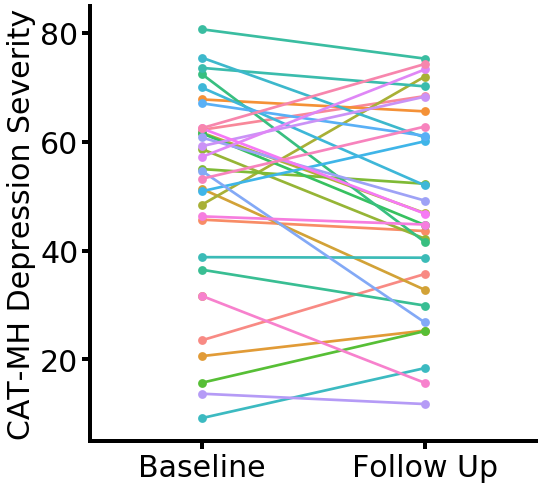

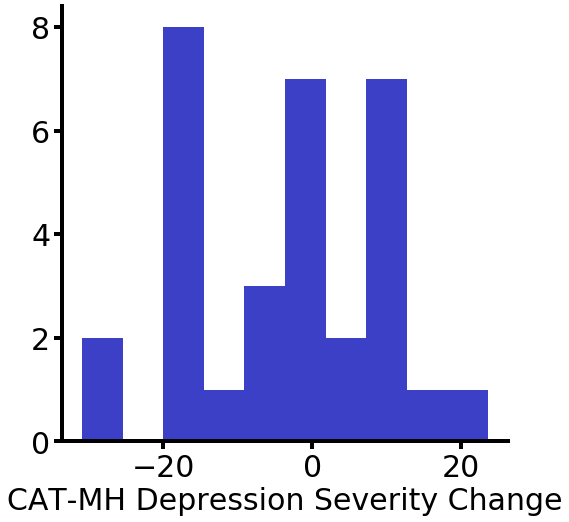

In [13]:
import plot_functions.format_axis as fmt
demog_df['catmh_dep_severity_change'] =  demog_df['catmh_dep_severity___fa'] - demog_df['catmh_dep_severity']
post = demog_df[['catmh_dep_severity___fa', 'subject_id']].rename(columns={'catmh_dep_severity___fa': 'catmh_dep_severity'})
baseline = demog_df[['catmh_dep_severity', 'subject_id']]

post['time'] = 'Follow Up'
baseline['time'] = 'Baseline'
order = ['Baseline', 'Follow Up']

_, ax = plt.subplots(figsize=(8,8))
catmh_data = pd.concat([baseline, post])
sns.pointplot(
    x='time',
    y='catmh_dep_severity',
    data=catmh_data,
    hue='subject_id',
    order=order,
    ax=ax
)
ax.legend().remove()
fmt.despine_thicken_axes(
    ax=ax,
    lw=4,
    fontsize=30,
    rotate_x=0,
)
sns.despine()
ax.set_xlabel('')
ax.set_ylabel('CAT-MH Depression Severity')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
ax.hist(
    demog_df['catmh_dep_severity_change'].dropna(),
    color=load_palette()['catmh_dep_severity_1'],
)

ax.set_xlabel('CAT-MH Depression Severity Change', fontsize=20)

fmt.despine_thicken_axes(
    ax=ax,
    lw=4,
    fontsize=30,

)
catmh_data.groupby('time').describe()

In [14]:
pd.DataFrame(demog_df[['hamd_total_change', 'sds_score_change', 'catmh_dep_severity_change']].describe())

,hamd_total_change,sds_score_change,catmh_dep_severity_change
count,27.000000,30.000000,32.000000
mean,-1.518519,-3.266667,-3.509375
std,6.381285,7.669615,13.175108
min,-22.000000,-18.000000,-30.900000
25%,-4.500000,-6.750000,-15.025000
50%,2.000000,-2.500000,-2.450000
75%,3.000000,0.000000,9.125000
max,4.000000,26.000000,23.600000


## Looking at correlation between CAT-MH and HAM-D Depression Assessments

Text(0.5, 1.0, 'r: 0.66 p: 0.0001')

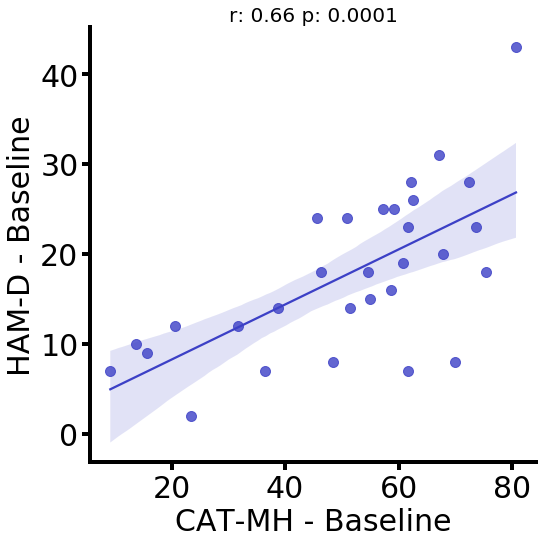

In [27]:
no_na_demog_df = demog_df[['catmh_dep_severity', 'hamd_total']].dropna()
r, p = stats.pearsonr(no_na_demog_df['catmh_dep_severity'], no_na_demog_df['hamd_total'])
fig, ax = plt.subplots(figsize=(8,8))
sns.regplot(
    data=demog_df,
    x='catmh_dep_severity',
    y='hamd_total',
    ax=ax,
    color=palette['catmh_dep_severity_1'],
    scatter_kws = {
        's': 100
    }
)
fmt.despine_thicken_axes(
    ax=ax,
    lw=4,
    fontsize=30,
)
ax.set_ylabel('HAM-D - Baseline') # (10 Day Rolling Average Before Score)
ax.set_xlabel('CAT-MH - Baseline', fontsize=30)
ax.set_title('r: ' + str(round(r,4)) + ' p: ' + str(round(p,4)), fontsize=20)

Text(0.5, 1.0, 'r: 0.4563 p: 0.0191')

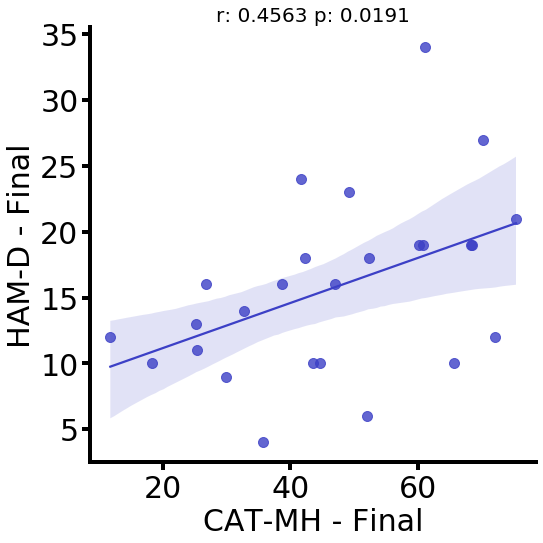

In [25]:
no_na_demog_df = demog_df[['catmh_dep_severity___fa', 'hamd_total___fa']].dropna()
r, p = stats.pearsonr(no_na_demog_df['catmh_dep_severity___fa'], no_na_demog_df['hamd_total___fa'])
fig, ax = plt.subplots(figsize=(8,8))
sns.regplot(
    data=demog_df,
    x='catmh_dep_severity___fa',
    y='hamd_total___fa',
    ax=ax,
    color=palette['catmh_dep_severity_1'],
    scatter_kws = {
        's': 100
    }
)
fmt.despine_thicken_axes(
    ax=ax,
    lw=4,
    fontsize=30,
)
ax.set_ylabel('HAM-D - Final') # (10 Day Rolling Average Before Score)
ax.set_xlabel('CAT-MH - Final', fontsize=30)
ax.set_title('r: ' + str(round(r,4)) + ' p: ' + str(round(p,4)), fontsize=20)

Text(0.5, 1.0, 'r: 0.0559 p: 0.7862')

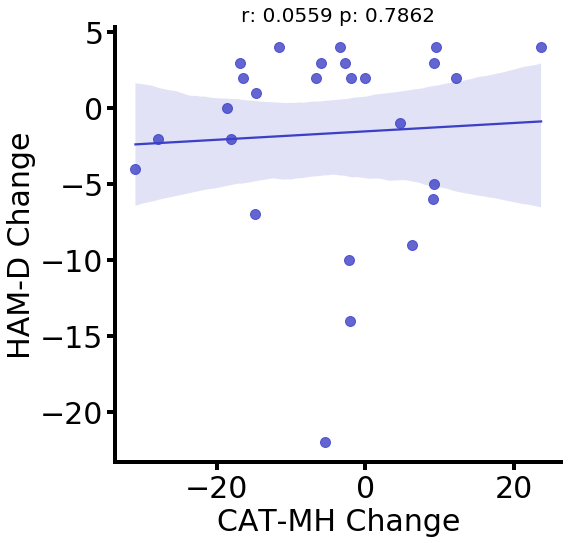

In [23]:
no_na_demog_df = demog_df[['catmh_dep_severity_change', 'hamd_total_change']].dropna()
r, p = stats.pearsonr(no_na_demog_df['catmh_dep_severity_change'], no_na_demog_df['hamd_total_change'])
fig, ax = plt.subplots(figsize=(8,8))
sns.regplot(
    data=demog_df,
    x='catmh_dep_severity_change',
    y='hamd_total_change',
    ax=ax,
    color=palette['catmh_dep_severity_1'],
    scatter_kws = {
        's': 100
    }
)
fmt.despine_thicken_axes(
    ax=ax,
    lw=4,
    fontsize=30,
)
ax.set_ylabel('HAM-D Change') # (10 Day Rolling Average Before Score)
ax.set_xlabel('CAT-MH Change', fontsize=30)
ax.set_title('r: ' + str(round(r,4)) + ' p: ' + str(round(p,4)), fontsize=20)